## Coupon_List

: 쿠폰별 다양한 정보 ( 장르 / 가격 / 기간 / 지역 )

In [10]:
from ml_config import *

### 1. Data Load

In [11]:
coupon_list = pd.read_csv('../data/coupon_list_train.csv')
coupon_list.tail()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
19408,Nail and eye salon,Nail and eye salon,65,10000,3500,2011-07-14 12:00,2011-07-17 12:00,3,2011-07-18,2011-12-30,...,1.0,1.0,1.0,1.0,1.0,1.0,Hokushinetsu,Niigata Prefecture,Niigata,fe334f1a5e0dc54eca76b9dd9559661b
19409,Food,Food,50,5980,2990,2011-09-30 12:00,2011-10-03 12:00,3,2011-10-04,2012-02-29,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",8dc11b257cb1c5b98e7b7c66d9b2b779
19410,Food,Food,50,6300,3150,2011-09-03 12:00,2011-09-05 12:00,2,2011-09-06,2011-11-30,...,1.0,2.0,2.0,1.0,1.0,2.0,Kanto,Tokyo,"Shibuya, Aoyama, Jiyugaoka",b15e2d7619c3fd9c6be567c971bdf4f4
19411,Food,Food,50,2400,1200,2011-07-15 12:00,2011-07-17 12:00,2,2011-07-18,2011-10-31,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Ginza Shinbashi, Tokyo, Ueno",e1141a4b2798450f36e40090659c0b07
19412,Food,Food,60,6000,2400,2011-07-23 12:00,2011-07-26 12:00,3,2011-07-27,2011-11-30,...,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",79303de03e3af7105cded55960d62ac3


#### Note :

1. Column은 CAPSULE_TEXT	GENRE_NAME	PRICE_RATE 등 총 24개로 이뤄짐
2. Column별 데이터 타입이 다양함

### 2. Overall EDA

In [12]:
coupon_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
CAPSULE_TEXT                  19413 non-null object
GENRE_NAME                    19413 non-null object
PRICE_RATE                    19413 non-null int64
CATALOG_PRICE                 19413 non-null int64
DISCOUNT_PRICE                19413 non-null int64
DISPFROM                      19413 non-null object
DISPEND                       19413 non-null object
DISPPERIOD                    19413 non-null int64
VALIDFROM                     13266 non-null object
VALIDEND                      13266 non-null object
VALIDPERIOD                   13266 non-null float64
USABLE_DATE_MON               12408 non-null float64
USABLE_DATE_TUE               12408 non-null float64
USABLE_DATE_WED               12408 non-null float64
USABLE_DATE_THU               12408 non-null float64
USABLE_DATE_FRI               12408 non-null float64
USABLE_DATE_SAT               12408 non-null float64
USAB

#### Note :

1. 총 24개의 Column, 19,413개의 데이터를 가지고 있음
1. 유효기간 관련 및 사용가능일에 따른 결측치 보완 필요

|Column Name               |Description                           |Type      |Length|Decimal|Note |
|-|-|-|-|-|-|
|CAPSULE_TEXT              |Capsule text                          |VARCHAR220|      |       |[JPN]|
|GENRE_NAME                |Category name                         |VARCHAR250|      |       |[JPN]|	 	 	 
|PRICE_RATE                |Discount rate                         |NUMBER    |4     |0      |     |	 	 	 	 
|CATALOG_PRICE             |List price                            |NUMBER    |10    |0      |	  | 	 	 	 
|DISCOUNT_PRICE            |Discount price                        |NUMBER    |10    |0      |     |	 	 	 	 
|DISPFROM                  |Sales release date                    |DATE      |      |       |	  |	 	 	 	 
|DISPEND                   |Sales end date                        |DATE      |	    |       |	  |	 	 	 	 
|DISPPERIOD                |Sales period (day)                    |NUMBER    |4     |0      |	  |	 	 	 
|VALIDFROM                 |The term of validity starts           |DATE      |      |       |	  |	 	 	 
|VALIDEND                  |The term of validity ends             |DATE      |	    |       |     |  	 	 	 
|VALIDPERIOD               |Validity period (day)                 |NUMBER    |4     |0      |     | 	 	 	 
|USABLE_DATE_MON           |Is available on Monday                |CHAR      |1     |       | 	  |	 	 	 
|USABLE_DATE_TUE           |Is available on Tuesday	              |CHAR      |1     |       | 	  |	 	 	 
|USABLE_DATE_WED           |Is available on Wednesday             |CHAR      |1     |       |	  |	 	 	 
|USABLE_DATE_THU           |Is available on Thursday              |CHAR      |1     |       |	  |	 	 	 	 
|USABLE_DATE_FRI           |Is available on Friday                |CHAR      |1     |       |	  |	 	 	 
|USABLE_DATE_SAT           |Is available on Saturday              |CHAR      |1     |       |	  |	 	 	 	 
|USABLE_DATE_SUN           |Is available on Sunday                |CHAR      |1     |       |     |	 	 	 	 
|USABLE_DATE_HOLIDAY       |Is available on holiday               |CHAR      |1     |       |     |
|USABLE_DATE_BEFORE_HOLIDAY|Is available on the day before holiday|CHAR      |1     |       |     | 	 	 	 
|large_area_name           |Large area name of shop location      |VARCHAR230|      |       |[JPN]| 	 	 
|ken_name                  |Prefecture name of shop	              |VARCHAR28 |	    |       |[JPN]| 	 	 
|small_area_name           |Small area name of shop location      |VARCHAR230|      |       |[JPN]|	 	 	 
|COUPON_ID_hash            |Coupon ID                             |VARCHAR232|	    |       |     |      

In [13]:
coupon_list.describe()

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY
count,19413.000000,19413.000000,19413.000000,19413.000000,13266.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000
mean,58.478391,11818.368258,4332.877659,3.166950,125.955902,0.936009,0.953901,0.982189,0.981867,1.000242,1.067618,0.921422,0.938024,1.044246
std,11.266571,16881.898880,5459.667448,1.346859,46.599249,0.309854,0.314045,0.217525,0.198105,0.319562,0.563260,0.424181,0.399619,0.534511
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,3675.000000,1550.000000,2.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,53.000000,6500.000000,2750.000000,3.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,13650.000000,4800.000000,4.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,680000.000000,100000.000000,36.000000,179.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
# Unique
for i in range(0, 23+1):
    print('{} : {}'.format(coupon_list.columns[i], len(set(coupon_list[coupon_list.columns[i]]))))

CAPSULE_TEXT : 24
GENRE_NAME : 13
PRICE_RATE : 71
CATALOG_PRICE : 2415
DISCOUNT_PRICE : 1115
DISPFROM : 378
DISPEND : 373
DISPPERIOD : 18
VALIDFROM : 377
VALIDEND : 515
VALIDPERIOD : 6327
USABLE_DATE_MON : 7008
USABLE_DATE_TUE : 7008
USABLE_DATE_WED : 7008
USABLE_DATE_THU : 7008
USABLE_DATE_FRI : 7008
USABLE_DATE_SAT : 7008
USABLE_DATE_SUN : 7008
USABLE_DATE_HOLIDAY : 7008
USABLE_DATE_BEFORE_HOLIDAY : 7008
large_area_name : 9
ken_name : 47
small_area_name : 55
COUPON_ID_hash : 19413


#### Note :

1. 날짜별 사용가능 일은 카테고리(0, 1)로 되어있지만 NAN값들로 인해 unique 값이 7,008개가 생성
2. 7,800개가 모든 요일에 동일하게 적용되는것을 보아 같은 품목에 NAN값이 있을 확률이 높다고 판단

### 3. CAPSULE_TEXT (소분류)

In [23]:
CAPSULE_TEXT = coupon_list.groupby("CAPSULE_TEXT").size().reset_index(name='counts')
CAPSULE_TEXT = CAPSULE_TEXT.sort_values(by=['counts'], ascending=False)
CAPSULE_TEXT = CAPSULE_TEXT.reset_index(drop=True)
CAPSULE_TEXT.head()

,CAPSULE_TEXT,counts
0,Delivery service,5841
1,Food,3658
2,Hotel,1943
3,Hair salon,1436
4,Japanese hotel,1351


In [27]:
sum(CAPSULE_TEXT['counts'][0:4]/19413)

0.6633699067635089

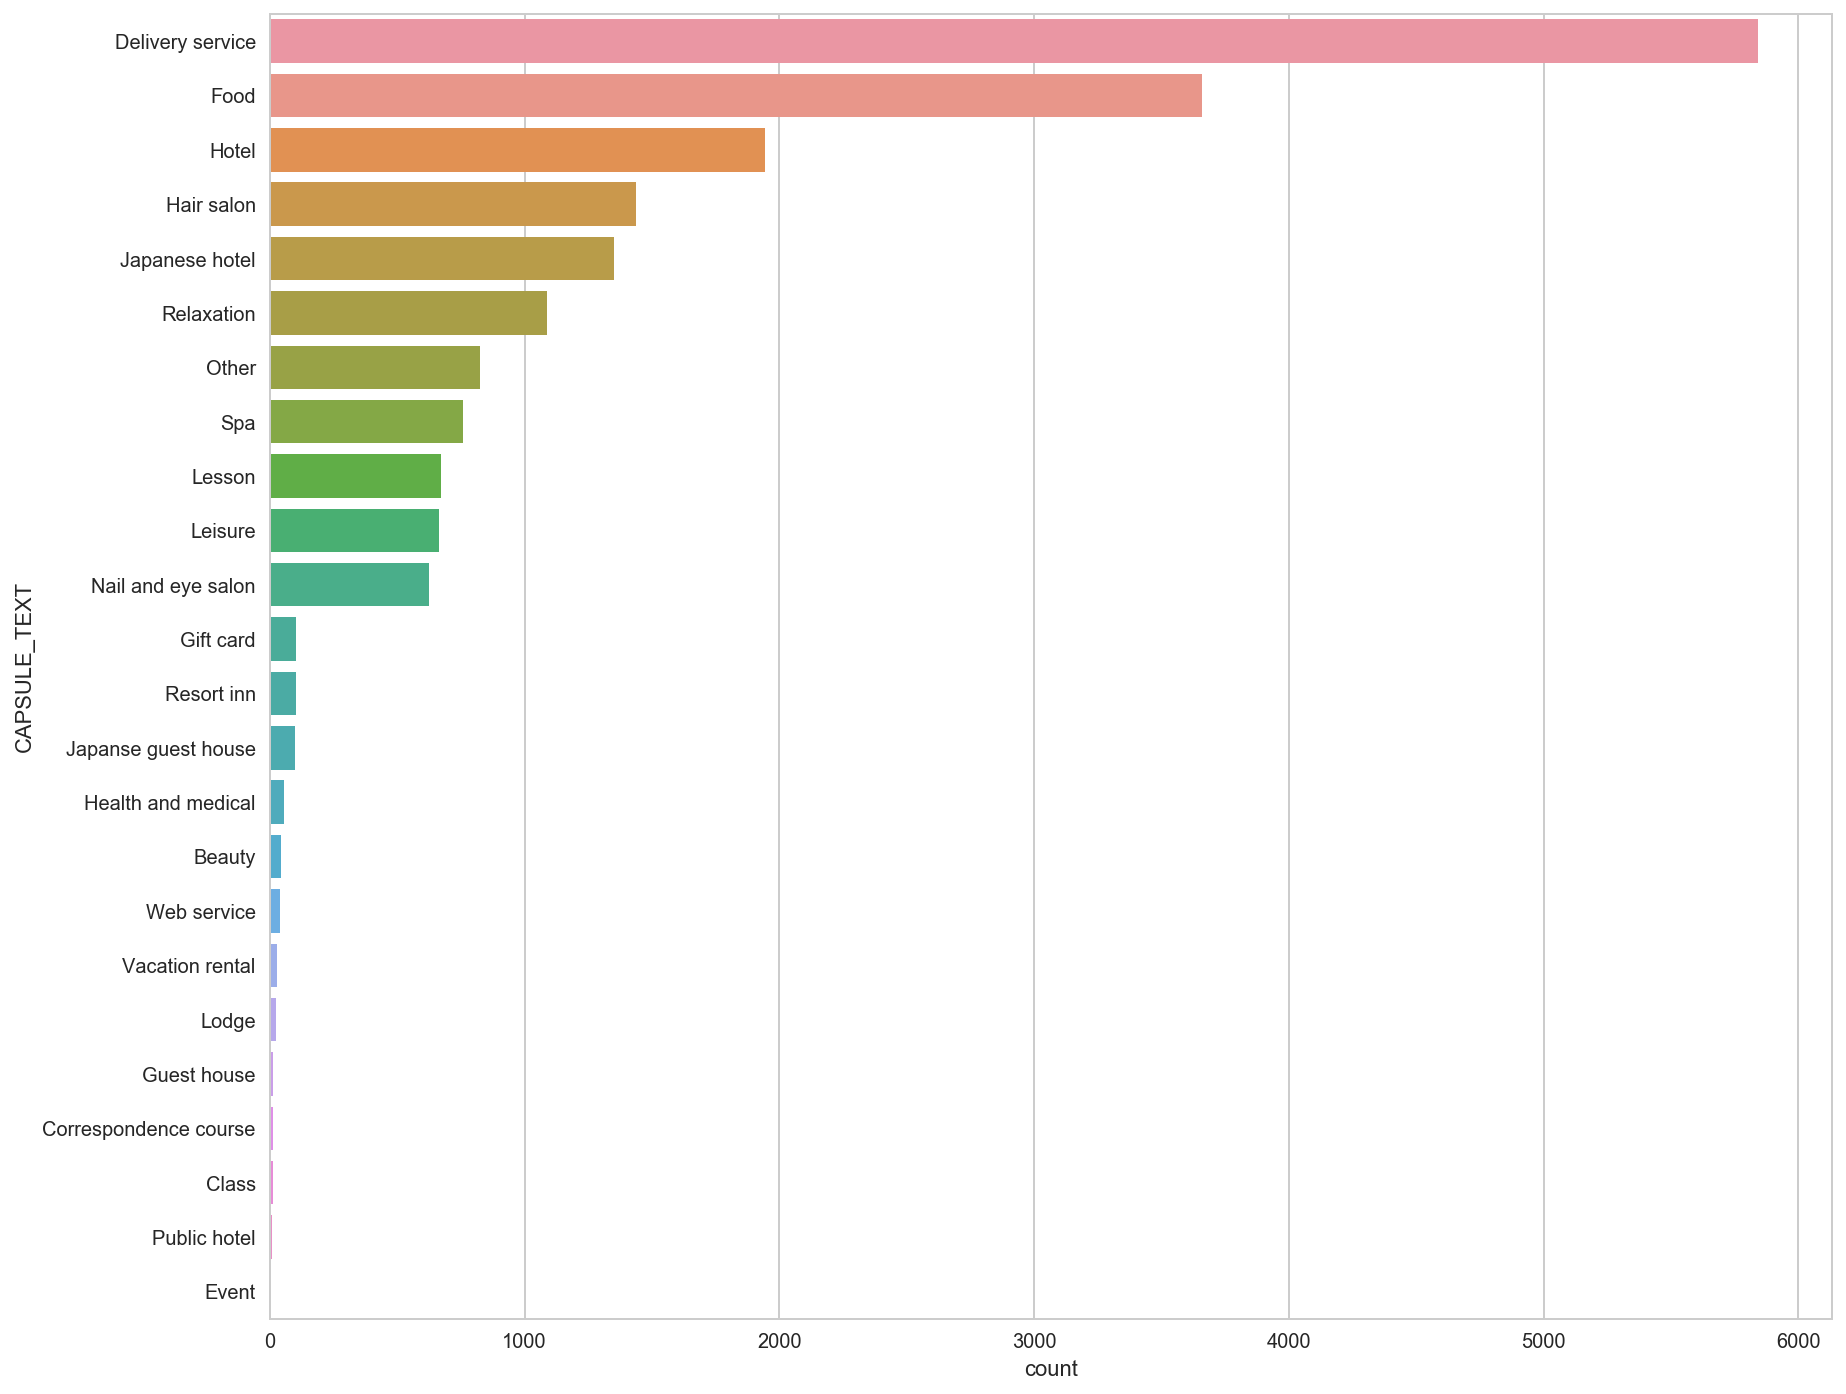

In [19]:
plt.figure(figsize=(14, 12))
sns.countplot(y = coupon_list['CAPSULE_TEXT'], data = coupon_list, order = coupon_list['CAPSULE_TEXT'].value_counts().index)
plt.show()

#### Note :

1. CAPSULE_TEXT는 총 24개의 종류를 가지고 있음
2. Delivery service, Food, Hotel 순으로 높았음
3. Delivery service가 압도적으로 높음

### 4. GENRE_NAME (대분류)

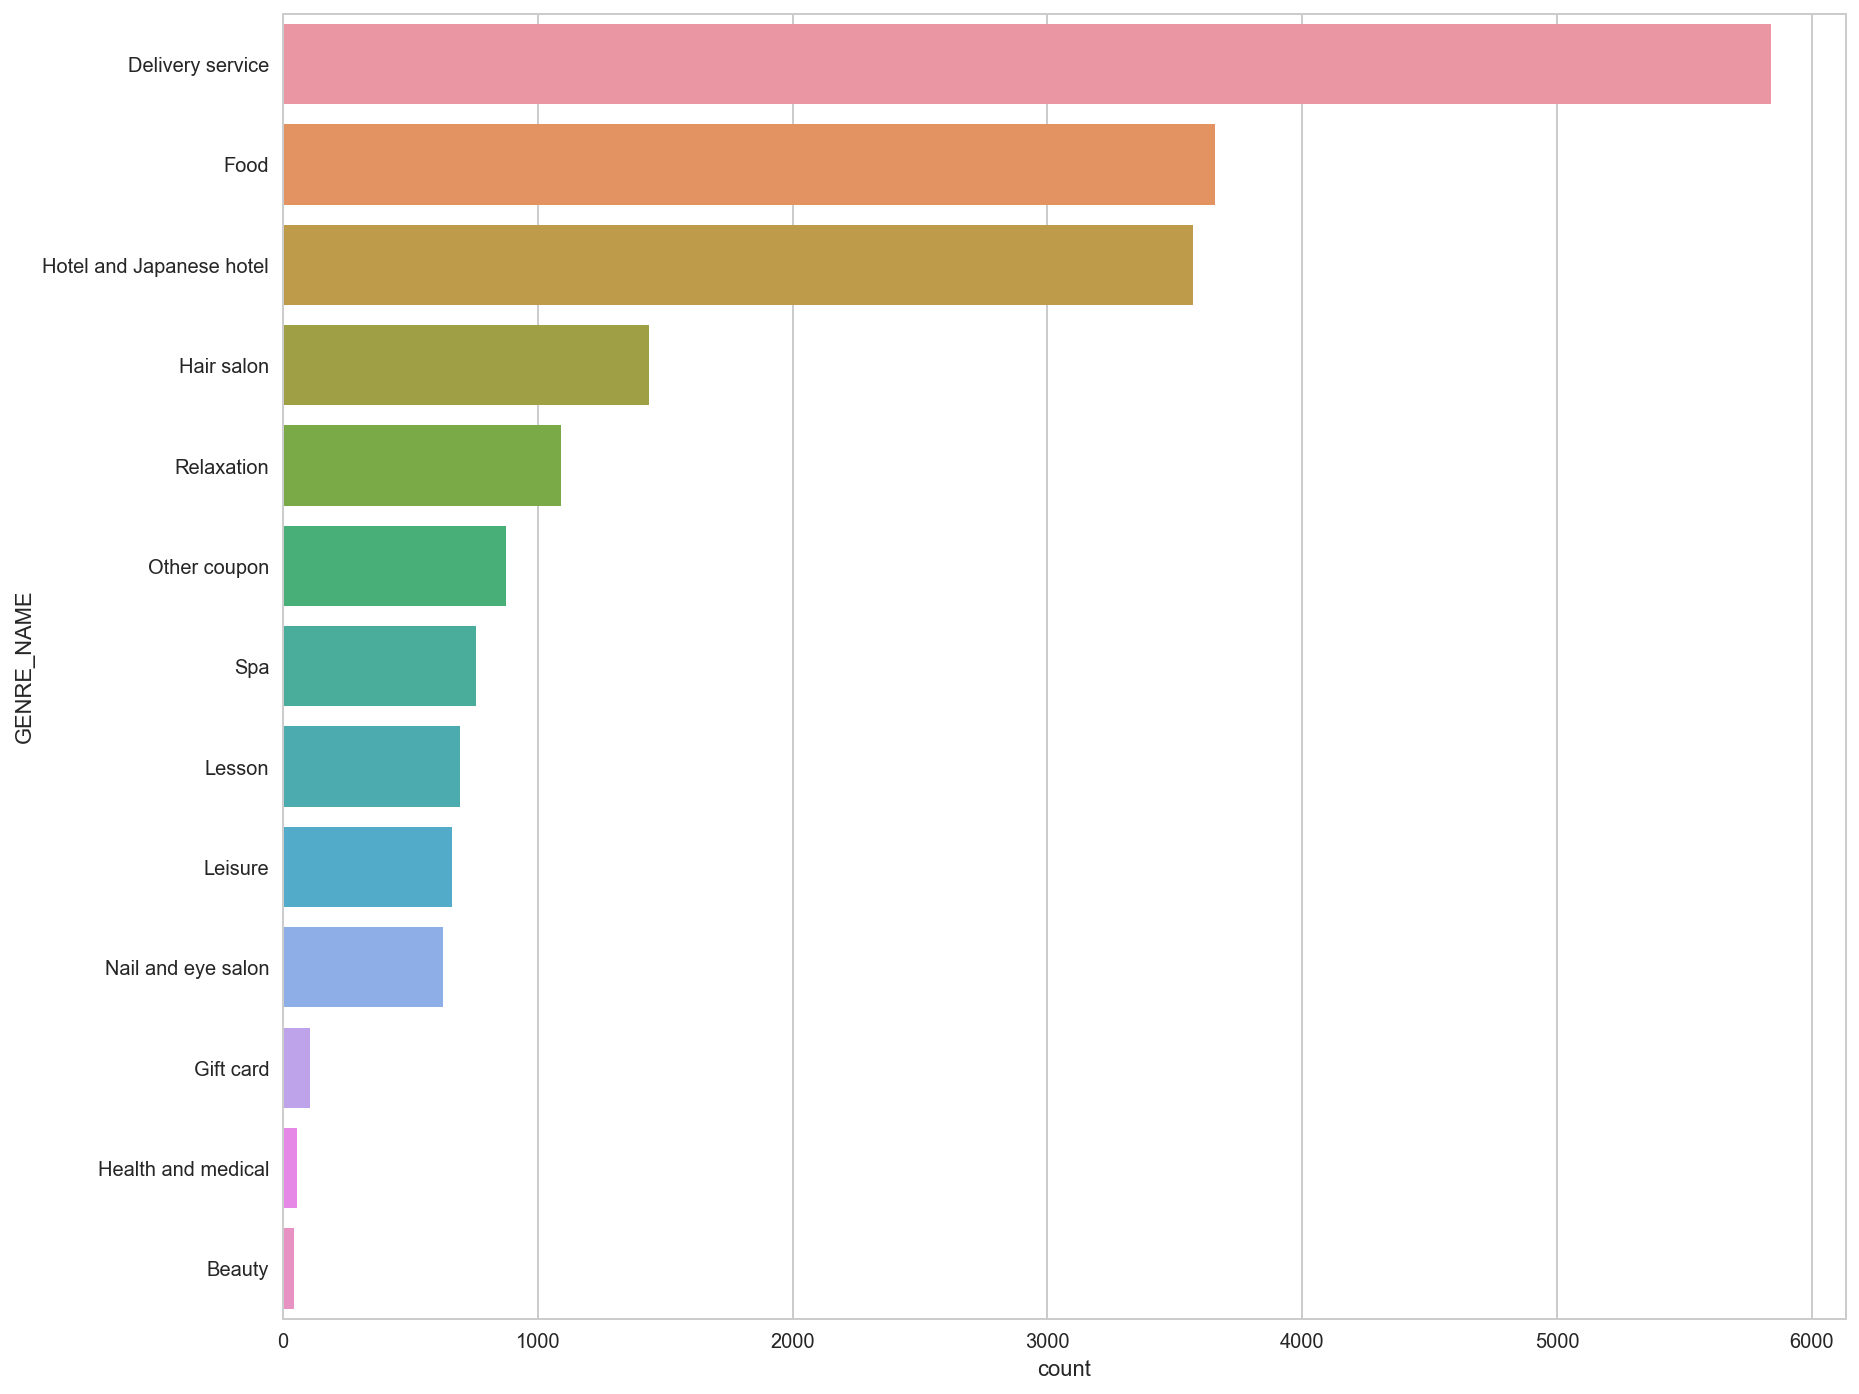

In [9]:
plt.figure(figsize=(14, 12))
sns.countplot(y = coupon_list['GENRE_NAME'], data = coupon_list, order = coupon_list['GENRE_NAME'].value_counts().index)
plt.show()

#### Note :

1. GENRE_NAME는 총 13개의 종류를 가지고 있음
2. Delivery service, Food, Hotel 순으로 높았음 (CAPSULE_TEXT와 같음)
3. Delivery service가 제일 높음

### 5. PRICE_RATE (판매가격율)